In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading data
data_train = pd.read_csv("C:/Users/User/Desktop/fraudTrain.csv")
data_test = pd.read_csv("C:/Users/User/Desktop/fraudTest.csv")

In [4]:
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


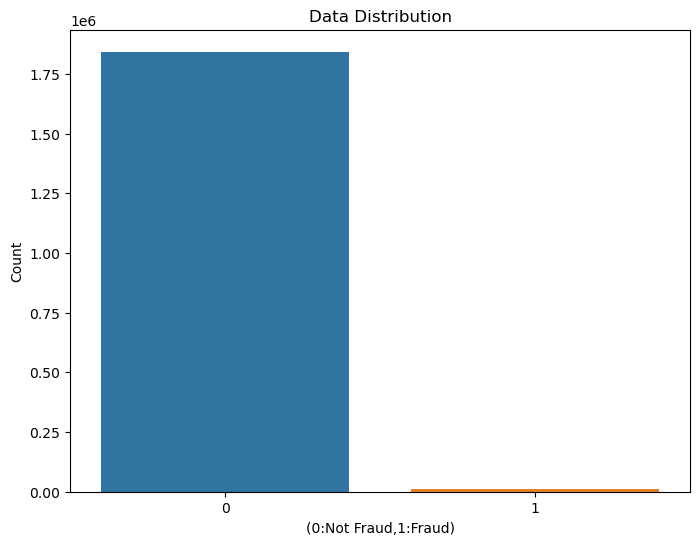

In [5]:
plt.figure(figsize=(8,6))
sb.countplot(x='is_fraud', data=pd.concat([data_train,data_test], ignore_index=True))
plt.title('Data Distribution')
plt.xlabel('(0:Not Fraud,1:Fraud)')
plt.ylabel('Count')
plt.show()

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
data_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
data_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
cols_to_drop=['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category']
data_train.drop(columns=cols_to_drop,inplace=True)
data_test.drop(columns=cols_to_drop,inplace=True)

In [11]:
print(data_train.shape)
print(data_test.shape)

(1296675, 14)
(555719, 14)


In [12]:
data_train['lat_dist']=abs(round(data_train['merch_lat']-data_train['lat'],2))
data_train['long_dist']=abs(round(data_train['merch_long']-data_train['long'],2))

data_test['lat_dist']=abs(round(data_test['merch_lat']-data_test['lat'],2))
data_test['long_dist']=abs(round(data_test['merch_long']-data_test['long'],2))

In [13]:
cols_to_drop=['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state']
data_train.drop(columns=cols_to_drop, inplace=True)
data_test.drop(columns=cols_to_drop, inplace=True)

In [14]:
data_train.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,F,28654,3495,0,0.07,0.87
1,107.23,F,99160,149,0,0.27,0.02
2,220.11,M,83252,4154,0,0.97,0.11
3,45.00,M,59632,1939,0,0.80,0.45
4,41.96,M,24433,99,0,0.25,0.83


In [15]:
data_train.gender=[1 if value == "M" else 0 for value in data_train.gender]
data_test.gender=[1 if value == "M" else 0 for value in data_test.gender]

data_train.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,0,28654,3495,0,0.07,0.87
1,107.23,0,99160,149,0,0.27,0.02
2,220.11,1,83252,4154,0,0.97,0.11
3,45.00,1,59632,1939,0,0.80,0.45
4,41.96,1,24433,99,0,0.25,0.83


In [16]:
data_test.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,2.86,1,29209,333497,0,0.02,0.27
1,29.84,0,84002,302,0,0.87,0.48
2,41.28,0,11710,34496,0,0.18,0.66
3,60.05,1,32780,54767,0,0.24,0.06
4,3.19,1,49632,1126,0,0.71,0.87


In [17]:
x_train = data_train.drop('is_fraud',axis=1)
x_test = data_test.drop('is_fraud',axis=1)
y_train = data_train['is_fraud']
y_test = data_test['is_fraud']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [21]:
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 45)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [24]:
y_pred1 = lr.predict(x_test)
y_pred1

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [27]:
import xgboost as xgb
xgbclf = xgb.XGBClassifier(learning_rate=0.1,n_estimators=100, max_depth=3, objective='binary:logistic',random_state=45)
xgbclf.fit(X_train,y_train)
y_pred = xgbclf.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [29]:
y_pred2 = lr.predict(x_test)
y_pred2

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [30]:
import joblib

In [31]:
joblib.dump(dtc,'Credit_model')

['Credit_model']

In [32]:
model= joblib.load('Credit_model')

In [33]:
prediction = model.predict([[4.97, 0, 28654, 3495, 0.07 , 0.87]])

In [34]:
if prediction == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Fraud Transaction
